## Importing Required Packages

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#from IPython.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

## Importing Data into Dataframes

In [2]:
## Reading the UK datasets

uk_gene_df = pd.read_csv("/Users/abhiram/Documents/Documents - Abhi’s MacBook Pro/Sireesha/Data Analysis Course/Live Industry Project/DATA/UK/Data/sim_av_gene.csv")
uk_patient_df = pd.read_csv("/Users/abhiram/Documents/Documents - Abhi’s MacBook Pro/Sireesha/Data Analysis Course/Live Industry Project/DATA/UK/Data/sim_av_patient.csv")
uk_tumour_df = pd.read_csv("/Users/abhiram/Documents/Documents - Abhi’s MacBook Pro/Sireesha/Data Analysis Course/Live Industry Project/DATA/UK/Data/sim_av_tumour.csv")
uk_sact_regimen_df = pd.read_csv("/Users/abhiram/Documents/Documents - Abhi’s MacBook Pro/Sireesha/Data Analysis Course/Live Industry Project/DATA/UK/Data/sim_sact_regimen.csv")
uk_sact_outcome_df = pd.read_csv("/Users/abhiram/Documents/Documents - Abhi’s MacBook Pro/Sireesha/Data Analysis Course/Live Industry Project/DATA/UK/Data/sim_sact_outcome.csv")
uk_rtds_episode_df = pd.read_csv("/Users/abhiram/Documents/Documents - Abhi’s MacBook Pro/Sireesha/Data Analysis Course/Live Industry Project/DATA/UK/Data/sim_rtds_episode.csv")
uk_rtds_prescription_df = pd.read_csv("/Users/abhiram/Documents/Documents - Abhi’s MacBook Pro/Sireesha/Data Analysis Course/Live Industry Project/DATA/UK/Data/sim_rtds_prescription.csv")
uk_rtds_exposure_df = pd.read_csv("/Users/abhiram/Documents/Documents - Abhi’s MacBook Pro/Sireesha/Data Analysis Course/Live Industry Project/DATA/UK/Data/sim_rtds_exposure.csv")
uk_sim_rtds_combined_df = pd.read_csv("/Users/abhiram/Documents/Documents - Abhi’s MacBook Pro/Sireesha/Data Analysis Course/Live Industry Project/DATA/UK/Data/sim_rtds_combined.csv")
uk_sact_cycle_df = pd.read_csv("/Users/abhiram/Documents/Documents - Abhi’s MacBook Pro/Sireesha/Data Analysis Course/Live Industry Project/DATA/UK/Data/sim_sact_cycle.csv")
uk_sact_drug_detail_df = pd.read_csv("/Users/abhiram/Documents/Documents - Abhi’s MacBook Pro/Sireesha/Data Analysis Course/Live Industry Project/DATA/UK/Data/sim_sact_drug_detail.csv")

/var/folders/xv/19m7n1351xndg1pdm9nlq93m0000gn/T/ipykernel_7046/266364796.py:5: DtypeWarning: Columns (14,15,16,17,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  uk_tumour_df = pd.read_csv("/Users/abhiram/Documents/Documents - Abhi’s MacBook Pro/Sireesha/Data Analysis Course/Live Industry Project/DATA/UK/Data/sim_av_tumour.csv")
/var/folders/xv/19m7n1351xndg1pdm9nlq93m0000gn/T/ipykernel_7046/266364796.py:8: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  uk_rtds_episode_df = pd.read_csv("/Users/abhiram/Documents/Documents - Abhi’s MacBook Pro/Sireesha/Data Analysis Course/Live Industry Project/DATA/UK/Data/sim_rtds_episode.csv")
/var/folders/xv/19m7n1351xndg1pdm9nlq93m0000gn/T/ipykernel_7046/266364796.py:9: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  uk_rtds_prescription_df = pd.read_csv("/Users/abhiram/Documents/Documents - Abhi’s M

In [3]:
# Reading the AUS datasets

aus_incidence_df = pd.read_excel("/Users/abhiram/Documents/Documents - Abhi’s MacBook Pro/Sireesha/Data Analysis Course/Live Industry Project/DATA/AUS/aus_cancer_incidence.xlsx", sheet_name="incidence", header = 5)
aus_mortality_df = pd.read_excel("/Users/abhiram/Documents/Documents - Abhi’s MacBook Pro/Sireesha/Data Analysis Course/Live Industry Project/DATA/AUS/aus_cancer_mortality.xlsx", sheet_name="mortality", header = 5)


## Lookup Tables Data Load

In [4]:
uk_icd_codes = pd.read_excel("/Users/abhiram/Documents/Documents - Abhi’s MacBook Pro/Sireesha/Data Analysis Course/Live Industry Project/DATA/UK/Documents/all_z_lookup_tables.xlsx", sheet_name="zicd", header = 0)

## Data Cleansing

In [5]:
## UK Data Cleansing

## icd codes lookup table cleaning

# Drop records where code is equal to description and description is null
uk_icd_codes_clean = uk_icd_codes.drop(uk_icd_codes[(uk_icd_codes['Code'] == uk_icd_codes['Description']) | (uk_icd_codes['Description'].isnull())].index)

# Reset the DataFrame index after removing rows
uk_icd_codes_clean = uk_icd_codes_clean.reset_index(drop=True)


In [6]:
# Convert date columns to datetime

uk_patient_df['VITALSTATUSDATE'] = pd.to_datetime(uk_patient_df['VITALSTATUSDATE'])

# Drop rows with NaN values in  'VITALSTATUSDATE'
uk_patient_df.dropna(subset=['VITALSTATUSDATE'], inplace=True)


In [7]:
# Convert date columns to datetime

uk_tumour_df['DIAGNOSISDATEBEST'] = pd.to_datetime(uk_tumour_df['DIAGNOSISDATEBEST'])

# Drop rows with NaN values in  'VITALSTATUSDATE'
uk_tumour_df.dropna(subset=['DIAGNOSISDATEBEST'], inplace=True)


In [8]:
## Australia Data Cleansing


# Replace NaN values in the 'Year' column with a year not present in the dataset (e.g., 1900)
aus_incidence_df['Year'].fillna(1900, inplace=True)
aus_mortality_df['Year'].fillna(1900, inplace=True)

# Convert the 'Year' column to integers
aus_incidence_df['Year'] = aus_incidence_df['Year'].astype(int)
aus_mortality_df['Year'] = aus_mortality_df['Year'].astype(int)

# Filter the data for the years 2016, 2017, 2018, and 2019
years_to_keep = [2016, 2017, 2018, 2019]
aus_incidence_df = aus_incidence_df[aus_incidence_df['Year'].isin(years_to_keep)]
aus_mortality_df = aus_mortality_df[aus_mortality_df['Year'].isin(years_to_keep)]


### Req 1: Analyze and Visualize the Trend of Tumor Types in AUS and the UK

In [9]:
## UK Cancer Incidence Trend
## Filtering data for the years 2016, 2017, 2018, and 2019 for the UK

## display the graph for each year seperately, and consider 3 character ICD 10 code instead of 4 character code, also check AUS data 

uk_tumour_df['DIAGNOSISYEAR'] = pd.to_datetime(uk_tumour_df['DIAGNOSISDATEBEST']).dt.year
uk_tumour_df_filtered = uk_tumour_df[uk_tumour_df['DIAGNOSISYEAR'].between(2016, 2019)]

## Joining 'uk_tumour_df_filtered' with 'uk_icd_codes' on 'SITE_ICDO3REV2011' and 'Code'
filtered_df = uk_tumour_df_filtered.merge(uk_icd_codes_clean, left_on='SITE_ICD10_O2_3CHAR', right_on='Code', how='left')

## Group by tumor types and count occurrences for the UK
uk_tumor_counts = filtered_df['Description'].value_counts().head(10)

## Australia Cancer Incidence Trend
# Group the data by 'Cancer group/site' and calculate the sum of 'Count'
aus_tumor_incidence = aus_incidence_df.groupby('Cancer group/site')['Count'].sum()

# Exclude 'All cancers combined' from the top 10
aus_top_10_tumor_counts = aus_tumor_incidence[aus_tumor_incidence.index != 'All cancers combined'].nlargest(10)

# Change the data type to int64
aus_top_10_tumor_counts = aus_top_10_tumor_counts.astype('int64')


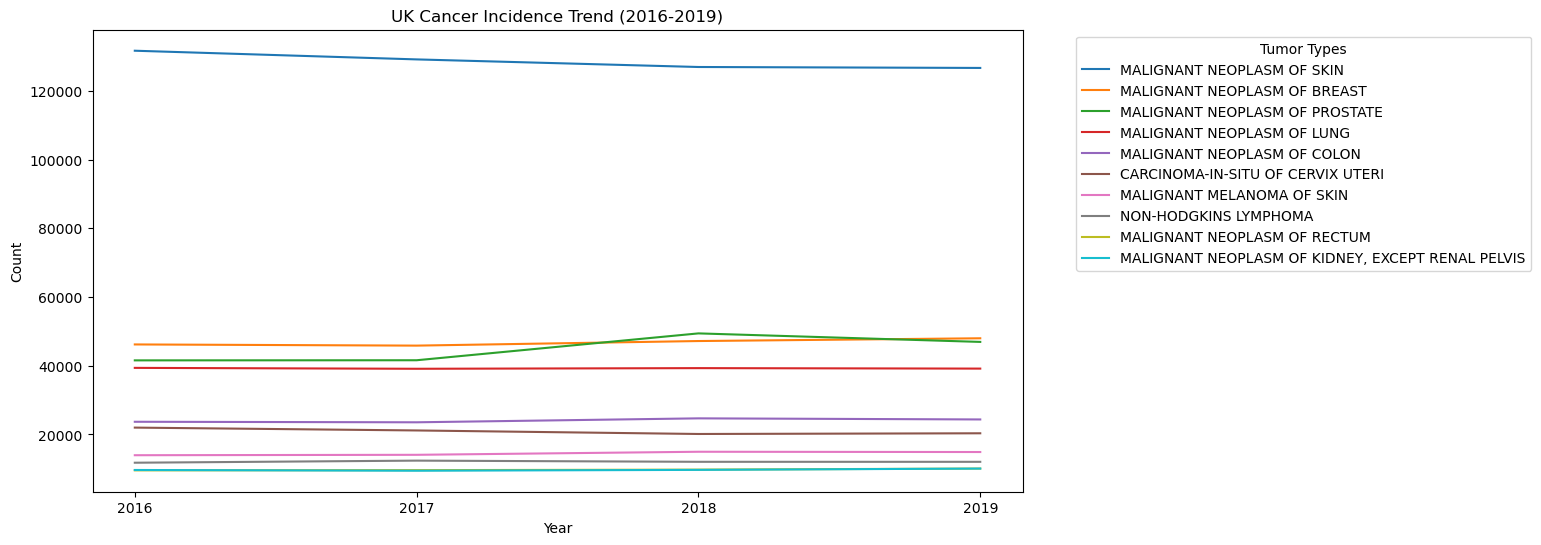

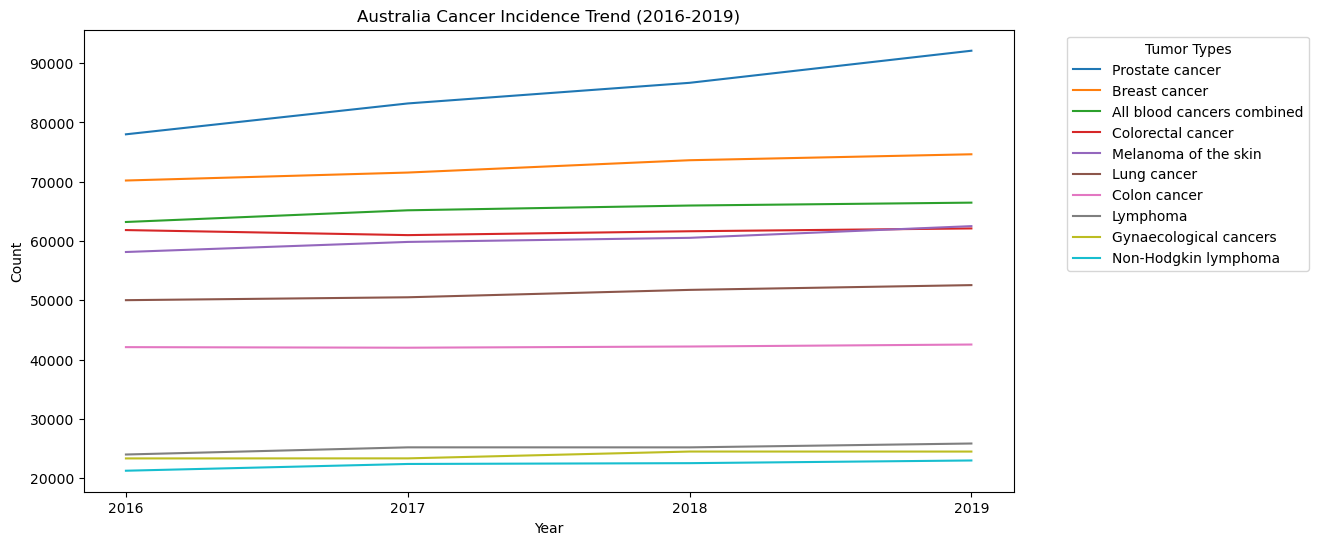

In [10]:
# UK Cancer Incidence Trend for the top 10 tumor types
plt.figure(figsize=(12, 6))
plt.title('UK Cancer Incidence Trend (2016-2019)')
plt.xlabel('Year')
plt.ylabel('Count')
for tumor_type in uk_tumor_counts.index:
    uk_tumor_data = filtered_df[filtered_df['Description'] == tumor_type]
    uk_tumor_data_yearly = uk_tumor_data['DIAGNOSISYEAR'].value_counts().sort_index()
    plt.plot(uk_tumor_data_yearly.index, uk_tumor_data_yearly.values, label=tumor_type)

plt.xticks([int(year) for year in uk_tumor_data_yearly.index])
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Tumor Types")
plt.show()

# Australia Cancer Incidence Trend for the top 10 tumor types (excluding 'All cancers combined')
plt.figure(figsize=(12, 6))
plt.title('Australia Cancer Incidence Trend (2016-2019)')
plt.xlabel('Year')
plt.ylabel('Count')
for tumor_type in aus_top_10_tumor_counts.index:
    aus_tumor_data = aus_incidence_df[aus_incidence_df['Cancer group/site'] == tumor_type]
    aus_tumor_data_yearly = aus_tumor_data.groupby('Year')['Count'].sum()
    plt.plot(aus_tumor_data_yearly.index, aus_tumor_data_yearly.values, label=tumor_type)

plt.xticks([int(year) for year in aus_tumor_data_yearly.index])
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Tumor Types")
plt.show()


## Req 2: Analyse the patient deaths during clinical trials for different tumour types in the UK

In [11]:
## Merging 'uk_sact_regimen_df' with 'uk_patient_df' to filter patients in active clinical trials
clinical_patients_df = uk_patient_df[uk_patient_df['PATIENTID'].isin(uk_sact_regimen_df[uk_sact_regimen_df['CLINICAL_TRIAL'].isin(['1', '01', 'Y'])]['ENCORE_PATIENT_ID'])]

In [12]:
## Merging the resulting DataFrame with 'uk_tumour_df' on 'PATIENTID' to associate patient data with tumor data
uk_patient_tumor_df = clinical_patients_df.merge(uk_tumour_df, on='PATIENTID', how='inner')


In [13]:
## Merge the combined DataFrame with 'uk_icd_codes' to obtain ICD codes and descriptions
uk_patient_tumor_df = uk_patient_tumor_df.merge(uk_icd_codes_clean, left_on='SITE_ICD10_O2_3CHAR', right_on='Code', how='left')

In [14]:
# Count patient deaths by tumor types with descriptions
deaths_by_tumor = uk_patient_tumor_df[uk_patient_tumor_df['VITALSTATUS'] == 'D']['Description'].value_counts().head(10)  ## Add .head(10) to get top 10 tumours
deaths_by_tumor

NON-HODGKINS LYMPHOMA               1795
LEUKAEMIA                           1569
MALIGNANT NEOPLASM OF LUNG          1060
MALIGNANT NEOPLASM OF BREAST         724
MALIGNANT NEOPLASM OF STOMACH        627
MALIGNANT NEOPLASM OF BLADDER        574
HODGKINS DISEASE                     547
MYELOMA                              519
MALIGNANT NEOPLASM OF OESOPHAGUS     336
MALIGNANT NEOPLASM OF LIVER          326
Name: Description, dtype: int64

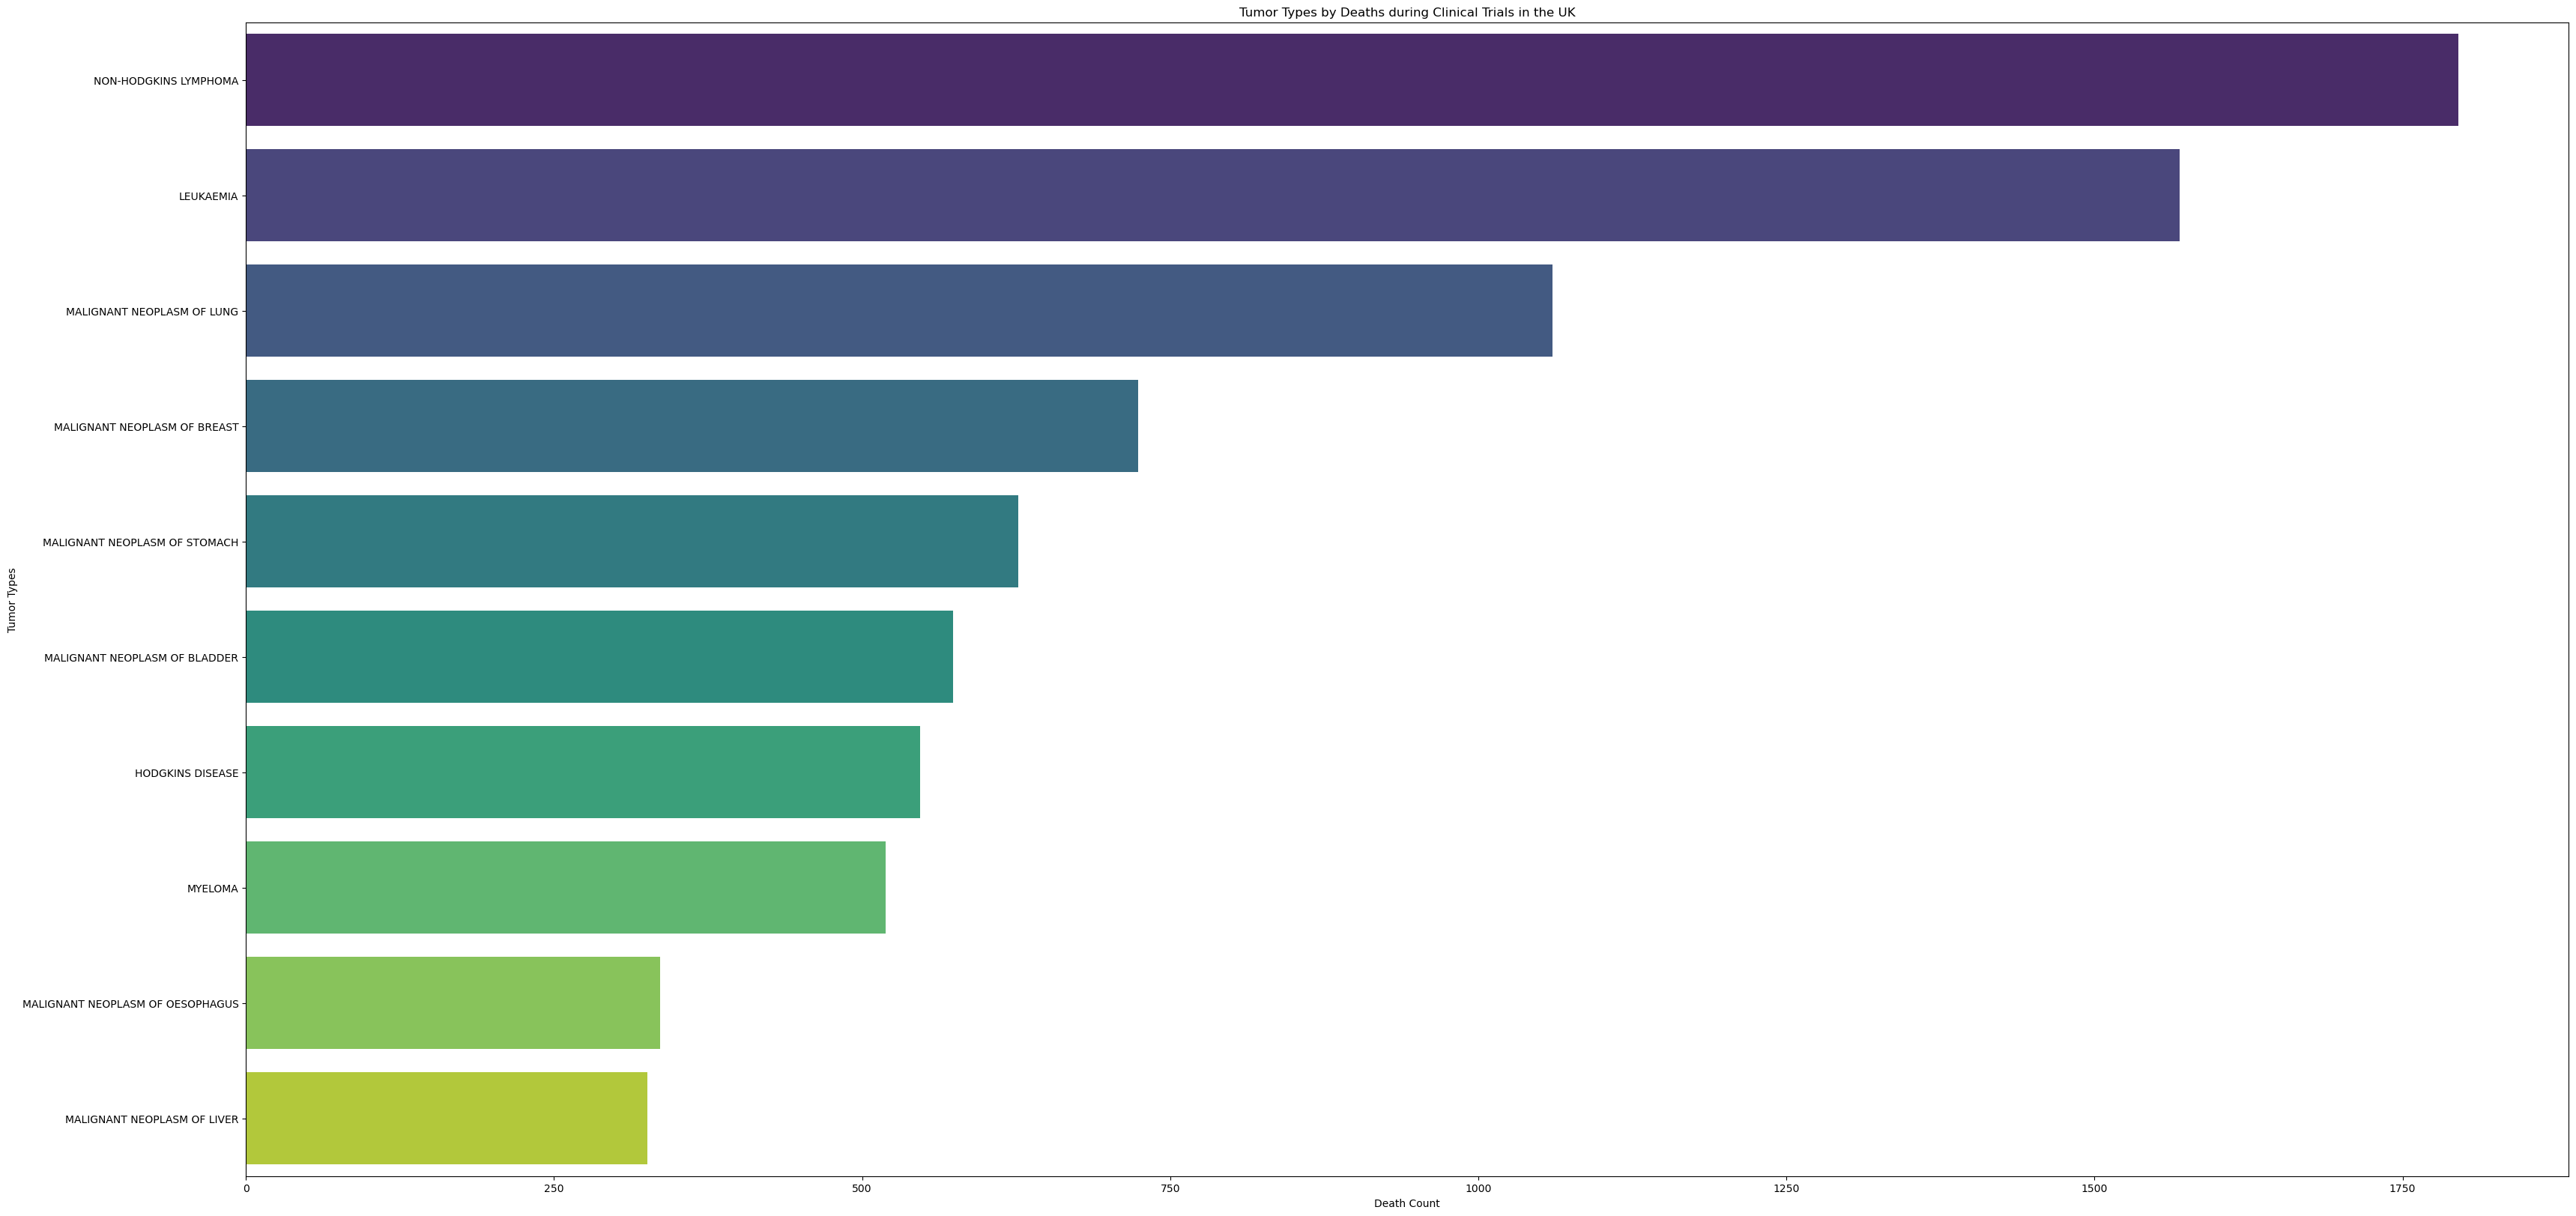

In [15]:
## Plotting the count of deaths by tumor types
plt.figure(figsize=(40, 20))
sns.barplot(x=deaths_by_tumor.values, y=deaths_by_tumor.index, palette='viridis')
plt.title("Tumor Types by Deaths during Clinical Trials in the UK")
plt.xlabel("Death Count")
plt.ylabel("Tumor Types")
plt.show()

## Req 3: Identify most common drug administered for different tumors (May be set of frquent tumours)in the UK for year 2017 and analyse the dosage.

In [16]:
# Step 1: Merging actual data
## Merging sim_sact_regimen with sim_sact_outcome
sact_regimen_outcome = uk_sact_regimen_df.merge(uk_sact_outcome_df, on='MERGED_REGIMEN_ID', how='inner')

## Merging sim_sact_cycle with sim_sact_drug_detail
sact_cycle_drug_detail = uk_sact_cycle_df.merge(uk_sact_drug_detail_df, on='MERGED_CYCLE_ID', how='inner')

## Merging sim_av_tumour with sim_av_gene
av_tumour_gene = uk_tumour_df.merge(uk_gene_df, on='TUMOURID', how='inner')

# Step 2: Merging the combined tables
# Merging sim_av_patient with sact_regimen_outcome
patient_regimen_outcome = uk_patient_df.merge(sact_regimen_outcome, left_on='PATIENTID', right_on='ENCORE_PATIENT_ID', how='inner')

# Merging patient_regimen_outcome with sact_cycle_drug_detail
patient_regimen_cycle = patient_regimen_outcome.merge(sact_cycle_drug_detail, on='MERGED_REGIMEN_ID', how='inner')

patient_tumour_gene = patient_regimen_cycle.merge(av_tumour_gene, left_on='PATIENTID', right_on='PATIENTID_x', how='inner')


In [17]:
# Step 3: Grouping and aggregating data to find the most common drug for each tumor

common_drugs_by_tumor = patient_tumour_gene.groupby('SITE_ICD10_O2_3CHAR')['BENCHMARK_GROUP'].value_counts().unstack(fill_value=0)

In [18]:
# Step 1: Selecting the columns 'SITE_ICD10_O2' and 'DRUG_GROUP' from the DataFrame
selected_columns = patient_tumour_gene[['SITE_ICD10_O2_3CHAR', 'BENCHMARK_GROUP']]

# Step 2: Merging with 'uk_icd_codes' to get descriptions for ICD code values
merged_df = selected_columns.merge(uk_icd_codes_clean, left_on='SITE_ICD10_O2_3CHAR', right_on='Code', how='left')


# Counting the maximum drugs used for each ICD code
max_drugs_used = merged_df.groupby(['Description'])['BENCHMARK_GROUP'].count().reset_index()
max_drugs_used = max_drugs_used.sort_values('BENCHMARK_GROUP', ascending=False)


In [39]:
# Counting the number of occurrences of 'BENCHMARK_GROUP' descriptions and 'SITE_ICD10_O2' codes
top_10_drugs = merged_df['BENCHMARK_GROUP'].value_counts().head(10).index
top_10_icd10 = merged_df['SITE_ICD10_O2_3CHAR'].value_counts().head(10).index

# Filtering the merged DataFrame for the top 10 'BENCHMARK_GROUP' descriptions and 'SITE_ICD10_O2' codes
filtered_df = merged_df[
    merged_df['BENCHMARK_GROUP'].isin(top_10_drugs) &
    merged_df['SITE_ICD10_O2_3CHAR'].isin(top_10_icd10)
]

# Grouping by 'SITE_ICD10_O2', 'Description', and 'BENCHMARK_GROUP' to get counts
result = filtered_df.groupby(['Description', 'BENCHMARK_GROUP'])['BENCHMARK_GROUP'].count().unstack(fill_value=0)
result

BENCHMARK_GROUP,CAPECITABINE,CAPECITABINE + OXALIPLATIN,CARBOPLATIN + PEMETREXED,CETUXIMAB + FLUOROURACIL + IRINOTECAN,CISPLATIN + PEMETREXED,CISPLATIN + VINORELBINE,FLUOROURACIL + IRINOTECAN,FLUOROURACIL + OXALIPLATIN,PEMBROLIZUMAB,TIPIRACIL + TRIFLURIDINE
Description,,,,,,,,,,
MALIGNANT MELANOMA OF SKIN,93,122,150,0,37,57,43,54,19034,0
MALIGNANT NEOPLASM OF BRAIN,10,6,0,0,0,15,17,47,210,7
MALIGNANT NEOPLASM OF BREAST,2831,295,51,33,18,0,234,270,67,101
MALIGNANT NEOPLASM OF COLON,80419,300741,24,15868,112,80,248423,204503,1170,22443
MALIGNANT NEOPLASM OF LUNG,858,612,75737,18,35165,38162,200,303,118608,25
MALIGNANT NEOPLASM OF OESOPHAGUS,1066,11,0,1201,27,40,414,1113,198,1155
MALIGNANT NEOPLASM OF RECTOSIGMOID JUNCTION,2467,20,0,3436,12,0,765,2989,68,2689
MALIGNANT NEOPLASM OF RECTUM,86714,64554,34,37063,0,28,25061,14603,266,35645
MALIGNANT NEOPLASM OF SKIN,1214,631,278,18,29,10,135,366,2201,61


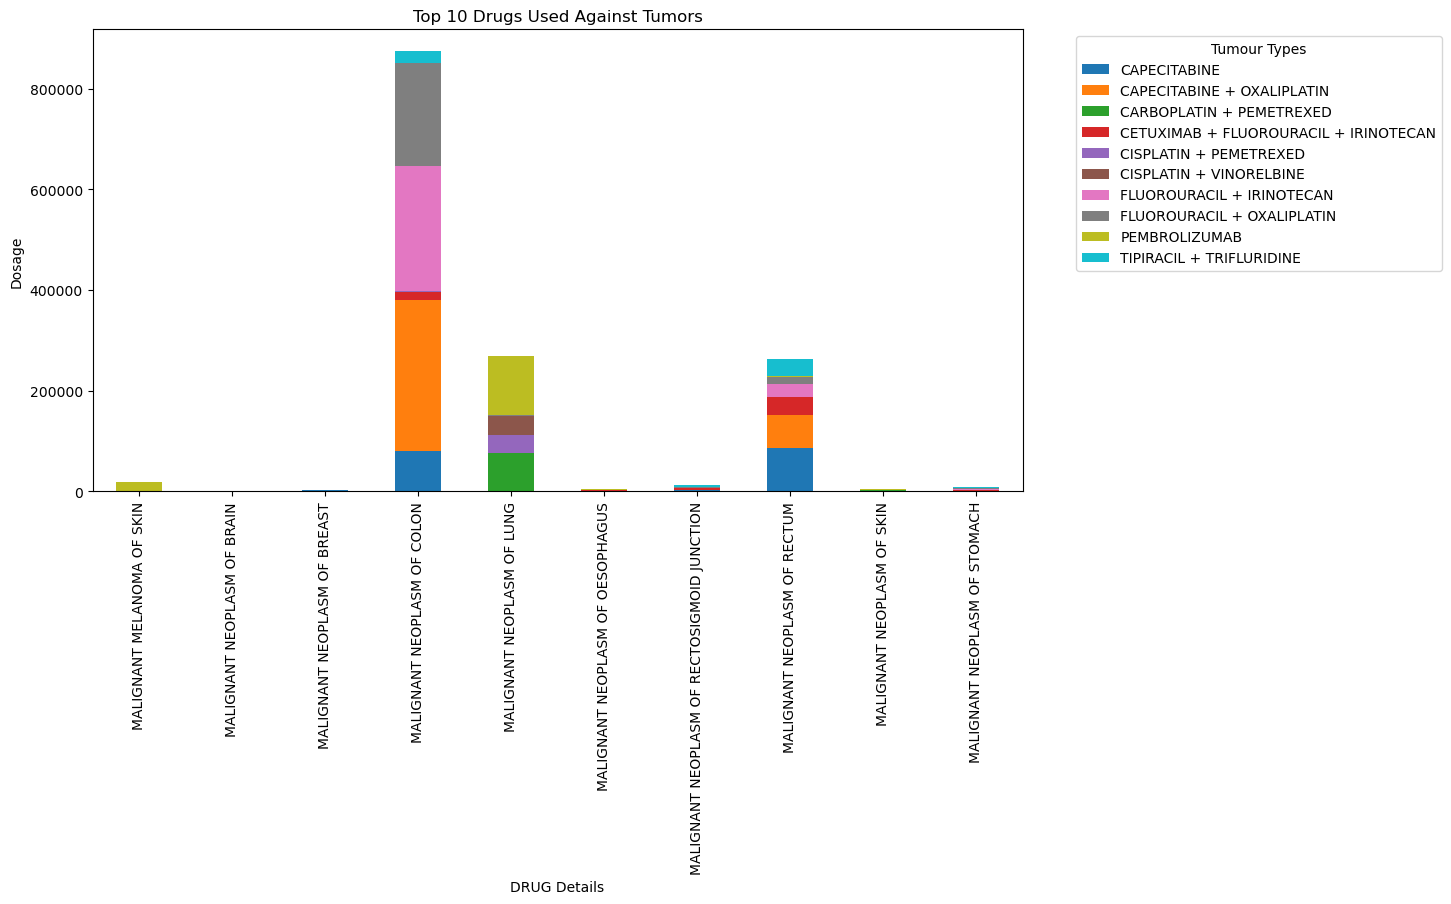

In [20]:
# Plotting the top 10 'BENCHMARK_GROUP' descriptions as a stacked bar chart
ax = result.plot(kind='bar', stacked=True, figsize=(12, 6))

# Setting the legend position to be outside the graph
ax.legend(title='Tumour Types', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Top 10 Drugs Used Against Tumors')
plt.xlabel('DRUG Details')
plt.ylabel('Dosage')
plt.show()


### Req 4: Analyse and visualize the rate of mortality for Blood Cancer by age for the year 2018 in both Australia and the UK datasets

In [21]:
# Filter the Australian mortality data for Blood Cancer in 2018
keywords = ['Blood']
aus_mortality_df_2018 = aus_mortality_df[
    (aus_mortality_df['Year'] == 2018) &
    aus_mortality_df['Cancer group/site'].str.contains('|'.join(keywords), case=False, regex=True)
]

# Convert age groups in Australia to match the UK format
age_groups_aus = ['00–04', '05–09', '10–14', '15–19', '20–24', '25–29', '30–34', '35–39', '40–44', '45–49', '50–54',
                 '55–59', '60–64', '65–69', '70–74', '75–79', '80–84', '85–89', '90+', 'All Ages Combined']

# Group Australian data by age groups
aus_mortality_by_age_group = aus_mortality_df_2018.groupby('Age group (years)')['Count'].sum()
aus_mortality_by_age_group.index = age_groups_aus

In [22]:
# Filter UK data for Blood Cancer after dropping rows with NaN values in 'Description'
keywords = ['leukaemia', 'lymphoma', 'myeloma']
matching_codes = uk_icd_codes_clean[uk_icd_codes_clean['Description'].str.contains('|'.join(keywords), case=False, regex=True)]

# Merge UK tumor data with matching ICD codes
uk_tumour_df_filtered = uk_tumour_df.merge(matching_codes, left_on='SITE_ICD10_O2_3CHAR', right_on='Code', how='inner')


# Filter the merged dataset for records in 2018
uk_tumour_df_2018 = uk_tumour_df_filtered[uk_tumour_df_filtered['DIAGNOSISDATEBEST'].dt.year == 2018]


In [23]:

# Filter UK patient data to include only deceased patients
deceased_patients = uk_patient_df[uk_patient_df['VITALSTATUS'] == 'D']

# Merge the deceased patient data with the tumor data for 2018
uk_tumour_df_2018 = uk_tumour_df_2018.merge(deceased_patients[['PATIENTID']], on='PATIENTID', how='inner')

In [24]:

# Calculate mortality rates for different age groups in the UK
uk_mortality_by_age = uk_tumour_df_2018.groupby('AGE')['PATIENTID'].count()

In [25]:
# Create numerical bin edges for UK age groups
age_groups_uk = [0, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 99]

# Group UK data to match the age groups
uk_mortality_by_age_group = uk_mortality_by_age.groupby(pd.cut(uk_mortality_by_age, age_groups_uk)).count()

# Align the data formats
uk_mortality_by_age_group.index = age_groups_aus

In [26]:
# Calculate the mortality rates for Australia
aus_mortality_rates = aus_mortality_by_age_group #/ 100000


In [27]:
# Calculate the mortality rates for the UK (assuming a UK population of 66.46 million in 2018)
uk_population_2018 = 66.46
uk_mortality_rates = (uk_mortality_by_age_group / uk_population_2018) * 100

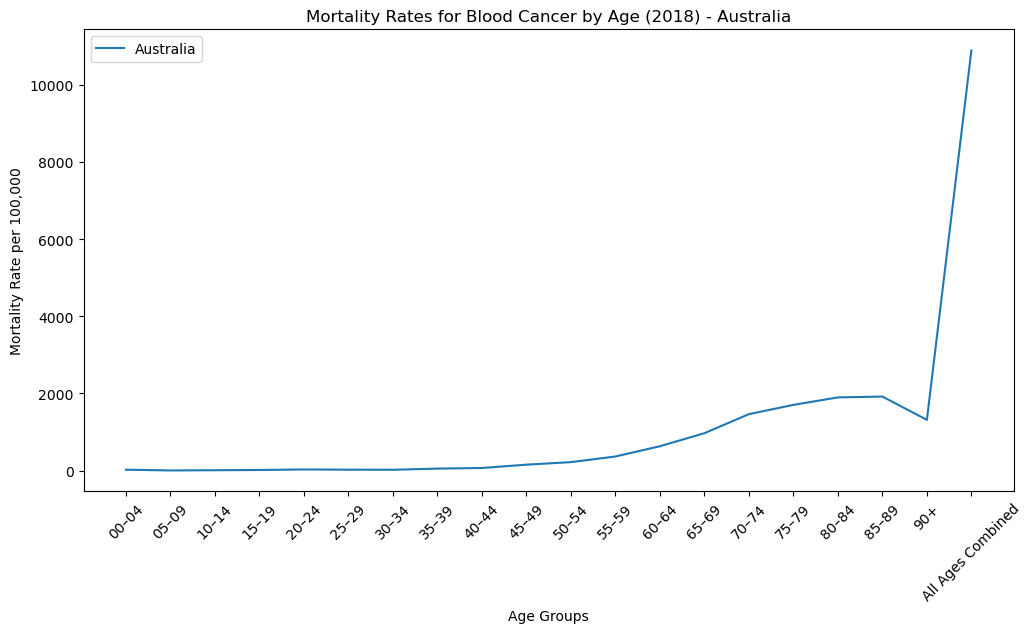

In [28]:
# Plot the mortality rates for Australia
plt.figure(figsize=(12, 6))
plt.plot(aus_mortality_rates, label='Australia')
plt.title('Mortality Rates for Blood Cancer by Age (2018) - Australia')
plt.xlabel('Age Groups')
plt.ylabel('Mortality Rate per 100,000')
plt.xticks(rotation=45)
plt.legend()
plt.show()

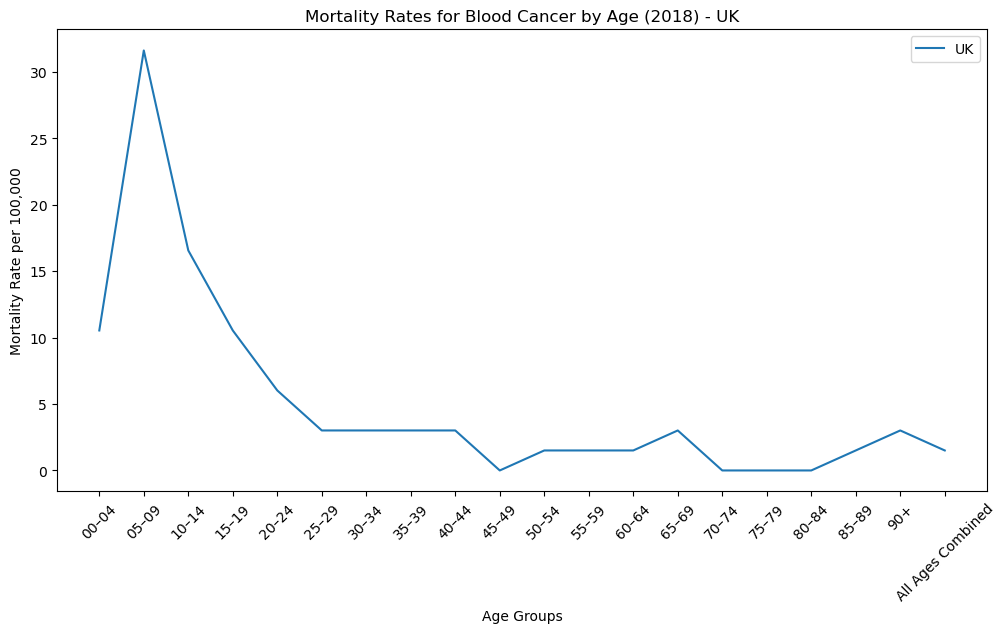

In [29]:
# Plot the mortality rates for the UK
plt.figure(figsize=(12, 6))
plt.plot(uk_mortality_rates, label='UK')
plt.title('Mortality Rates for Blood Cancer by Age (2018) - UK')
plt.xlabel('Age Groups')
plt.ylabel('Mortality Rate per 100,000')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Stakeholder Req 1:  Mean survival time in days for lung cancer patients diagnosed in 2016

In [30]:
## Step 1: Filtering the tumor dataset for lung cancer patients diagnosed in 2016
cancer_diagnosed_2016 = uk_tumour_df[
    (uk_tumour_df['DIAGNOSISDATEBEST'].dt.year == 2016)  # Filter for diagnosis in 2016
]

In [31]:
## Step 2: Filtering the patient dataset for patients diagnosed with lung cancer in 2016


# Filter the ICD codes to include only descriptions containing 'lung' (case-insensitive)
lung_icd_codes = uk_icd_codes_clean[uk_icd_codes_clean['Description'].str.contains('lung', case=False)]

lung_cancer_merge_2016 = cancer_diagnosed_2016.merge(lung_icd_codes, left_on='SITE_ICD10_O2_3CHAR', right_on='Code', how='inner')



lung_cancer_patients_2016 = lung_cancer_merge_2016[
    (lung_cancer_merge_2016['DIAGNOSISDATEBEST'].dt.year == 2016)  # Filtering for diagnosis in 2016
]




In [32]:
# Merge the tumor dataset with the filtered ICD codes to get only lung cancer patients
lung_cancer_diagnosed_2016 = cancer_diagnosed_2016.merge(lung_icd_codes, left_on='SITE_ICD10_O2_3CHAR', right_on='Code', how='inner')


In [33]:
# Merge the filtered tumor dataset with the patient dataset on 'PATIENTID'
lung_cancer_merge_2016 = lung_cancer_diagnosed_2016.merge(uk_patient_df, on='PATIENTID', how='inner')

In [34]:
## Step 3: Merge the tumor and patient datasets on 'PATIENTID'
## merged_data = lung_cancer_diagnosed_2016.merge(lung_cancer_patients_2016, on='PATIENTID', how='inner')
## Calculate the mean survival time for lung cancer patients diagnosed in 2016
lung_cancer_merge_2016['DIAGNOSISDATEBEST'] = pd.to_datetime(lung_cancer_merge_2016['DIAGNOSISDATEBEST'])
lung_cancer_merge_2016['VITALSTATUSDATE'] = pd.to_datetime(lung_cancer_merge_2016['VITALSTATUSDATE'])
lung_cancer_merge_2016['SurvivalTime'] = (lung_cancer_merge_2016['VITALSTATUSDATE'] - lung_cancer_merge_2016['DIAGNOSISDATEBEST']).dt.days


In [35]:
# Calculate the mean survival time
mean_survival_time = lung_cancer_merge_2016['SurvivalTime'].mean()

print("Mean Survival Time for Lung Cancer Patients Diagnosed in 2016:", mean_survival_time, "days")

Mean Survival Time for Lung Cancer Patients Diagnosed in 2016: 731.0200716481618 days


### Plot the survival fit curve for a specific year (2016)

In [36]:
# Calculate survival time
uk_patient_df['SurvivalTime'] = (uk_patient_df['VITALSTATUSDATE'] - uk_tumour_df['DIAGNOSISDATEBEST']).dt.days

# Filter patients who experienced the event (death)
dead_patients = uk_patient_df[uk_patient_df['VITALSTATUS'] == 'D']

# Count the number of dead patients for each number of days
death_counts = dead_patients['SurvivalTime'].value_counts().sort_index()

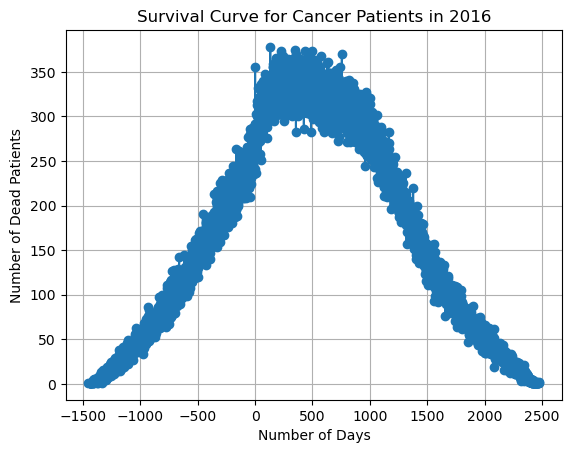

In [38]:
# Plot the line chart
plt.plot(death_counts.index, death_counts.values, marker='o', linestyle='-')
plt.xlabel("Number of Days")
plt.ylabel("Number of Dead Patients")
plt.title("Survival Curve for Cancer Patients in 2016")
plt.grid()
plt.show()
